# Dados socioeconomicos de países (Análise de Correspondência Múltipla)
- Péricles S. G. Marques
- https://www.linkedin.com/in/periclessavio/

### Objetivo:
Avaliar as relações entre múltiplos variáveis

### Carregar a base de dados

In [27]:
import pandas as pd

paises = pd.read_csv('arquivos/country.csv')
paises.set_index('country', inplace = True)

In [28]:
paises.head()

,continent,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,,
Luxembourg,Europe,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000
Norway,Europe,3.2,39.7,9.48,28.5,62300,5.95,81.0,1.95,87800
Switzerland,Europe,4.5,64.0,11.50,53.3,55500,317.00,82.2,1.52,74600
Qatar,Asia,9.0,62.3,1.81,23.8,125000,6.98,79.5,2.07,70300
Denmark,Europe,4.1,50.5,11.40,43.6,44000,3.22,79.5,1.87,58000


##### Análise e visualizar dos dados

In [29]:
paises.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Luxembourg to Burundi
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   continent   167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


In [30]:
paises.isna().sum()

continent     0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [31]:
paises.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.761018,6.815689,46.890215,17144.688623,54.238323,70.555689,2.947964,12964.155689
std,40.328931,27.724183,2.746837,24.209589,19278.067698,227.836007,8.893172,1.513848,18328.704809
min,2.600000,2.200000,1.810000,0.065900,609.000000,-987.000000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,2.875000,65.300000,1.795000,1330.000000
50%,19.300000,35.400000,6.320000,43.300000,9960.000000,6.940000,73.100000,2.410000,4660.000000
75%,62.100000,51.400000,8.600000,58.750000,22800.000000,15.200000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,991.000000,82.800000,7.490000,105000.000000


##### Categorização
Para este exercício, todas as variáveis numéricas foram transformadas em variáveis categóricas.

In [32]:
# função que transforma os dados de acordo com os quartis
def num_to_cat(dataframe, coluna_analisar):
    #doenca_coracao[nova_coluna] = ''

    quartil_inf = dataframe.describe().loc['25%', coluna_analisar]
    quartil_sup = dataframe.describe().loc['75%', coluna_analisar]

    nova_coluna = coluna_analisar + '_'

    df = dataframe

    df.loc[df[coluna_analisar] >= quartil_sup, nova_coluna] = 'alto'
    df.loc[(df[coluna_analisar] >= quartil_inf) & (df[coluna_analisar] < quartil_sup), nova_coluna] = 'médio'
    df.loc[df[coluna_analisar] < quartil_inf, nova_coluna] = 'baixo'
    df.drop([nova_coluna], axis=1)

    return df[nova_coluna].tolist()

paises['child_mort'] = num_to_cat(pd.read_csv('arquivos/country.csv'), 'child_mort')
paises['exports'] = num_to_cat(pd.read_csv('arquivos/country.csv'), 'exports')
paises['health'] = num_to_cat(pd.read_csv('arquivos/country.csv'), 'health')
paises['imports'] = num_to_cat(pd.read_csv('arquivos/country.csv'), 'imports')
paises['income'] = num_to_cat(pd.read_csv('arquivos/country.csv'), 'income')
paises['inflation'] = num_to_cat(pd.read_csv('arquivos/country.csv'), 'inflation')
paises['life_expec'] = num_to_cat(pd.read_csv('arquivos/country.csv'), 'life_expec')
paises['total_fer'] = num_to_cat(pd.read_csv('arquivos/country.csv'), 'total_fer')
paises['gdpp'] = num_to_cat(pd.read_csv('arquivos/country.csv'), 'gdpp')

paises

,continent,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,,
Luxembourg,Europe,baixo,alto,médio,alto,alto,médio,alto,baixo,alto
Norway,Europe,baixo,médio,alto,baixo,alto,médio,alto,médio,alto
Switzerland,Europe,baixo,alto,alto,médio,alto,alto,alto,baixo,alto
Qatar,Asia,médio,alto,baixo,baixo,alto,médio,alto,médio,alto
Denmark,Europe,baixo,médio,alto,médio,alto,médio,alto,médio,alto
...,...,...,...,...,...,...,...,...,...,...
Sierra Leone,Africa,alto,baixo,alto,médio,baixo,alto,baixo,alto,baixo
Niger,Africa,alto,baixo,médio,médio,baixo,baixo,baixo,alto,baixo
"Congo, Dem. Rep.",Africa,alto,médio,médio,médio,baixo,alto,baixo,alto,baixo


In [37]:
paises.reset_index()

,country,continent,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Luxembourg,Europe,baixo,alto,médio,alto,alto,médio,alto,baixo,alto
1,Norway,Europe,baixo,médio,alto,baixo,alto,médio,alto,médio,alto
2,Switzerland,Europe,baixo,alto,alto,médio,alto,alto,alto,baixo,alto
3,Qatar,Asia,médio,alto,baixo,baixo,alto,médio,alto,médio,alto
4,Denmark,Europe,baixo,médio,alto,médio,alto,médio,alto,médio,alto
...,...,...,...,...,...,...,...,...,...,...,...
162,Sierra Leone,Africa,alto,baixo,alto,médio,baixo,alto,baixo,alto,baixo
163,Niger,Africa,alto,baixo,médio,médio,baixo,baixo,baixo,alto,baixo
164,"Congo, Dem. Rep.",Africa,alto,médio,médio,médio,baixo,alto,baixo,alto,baixo
165,Liberia,Africa,alto,baixo,alto,alto,baixo,médio,baixo,alto,baixo


### Elaboração do MCA 

In [34]:
from prince import MCA
mca = MCA(n_components = 2, n_iter = 5, random_state = 101)
mca.fit(paises)
tips_mca = mca.transform(paises)
tips_mca.head()

,0,1
Luxembourg,-1.007567,0.646027
Norway,-0.882946,0.698555
Switzerland,-1.100191,0.944957
Qatar,-0.522918,0.033906
Denmark,-0.887278,0.709345


### Mapa perceptual

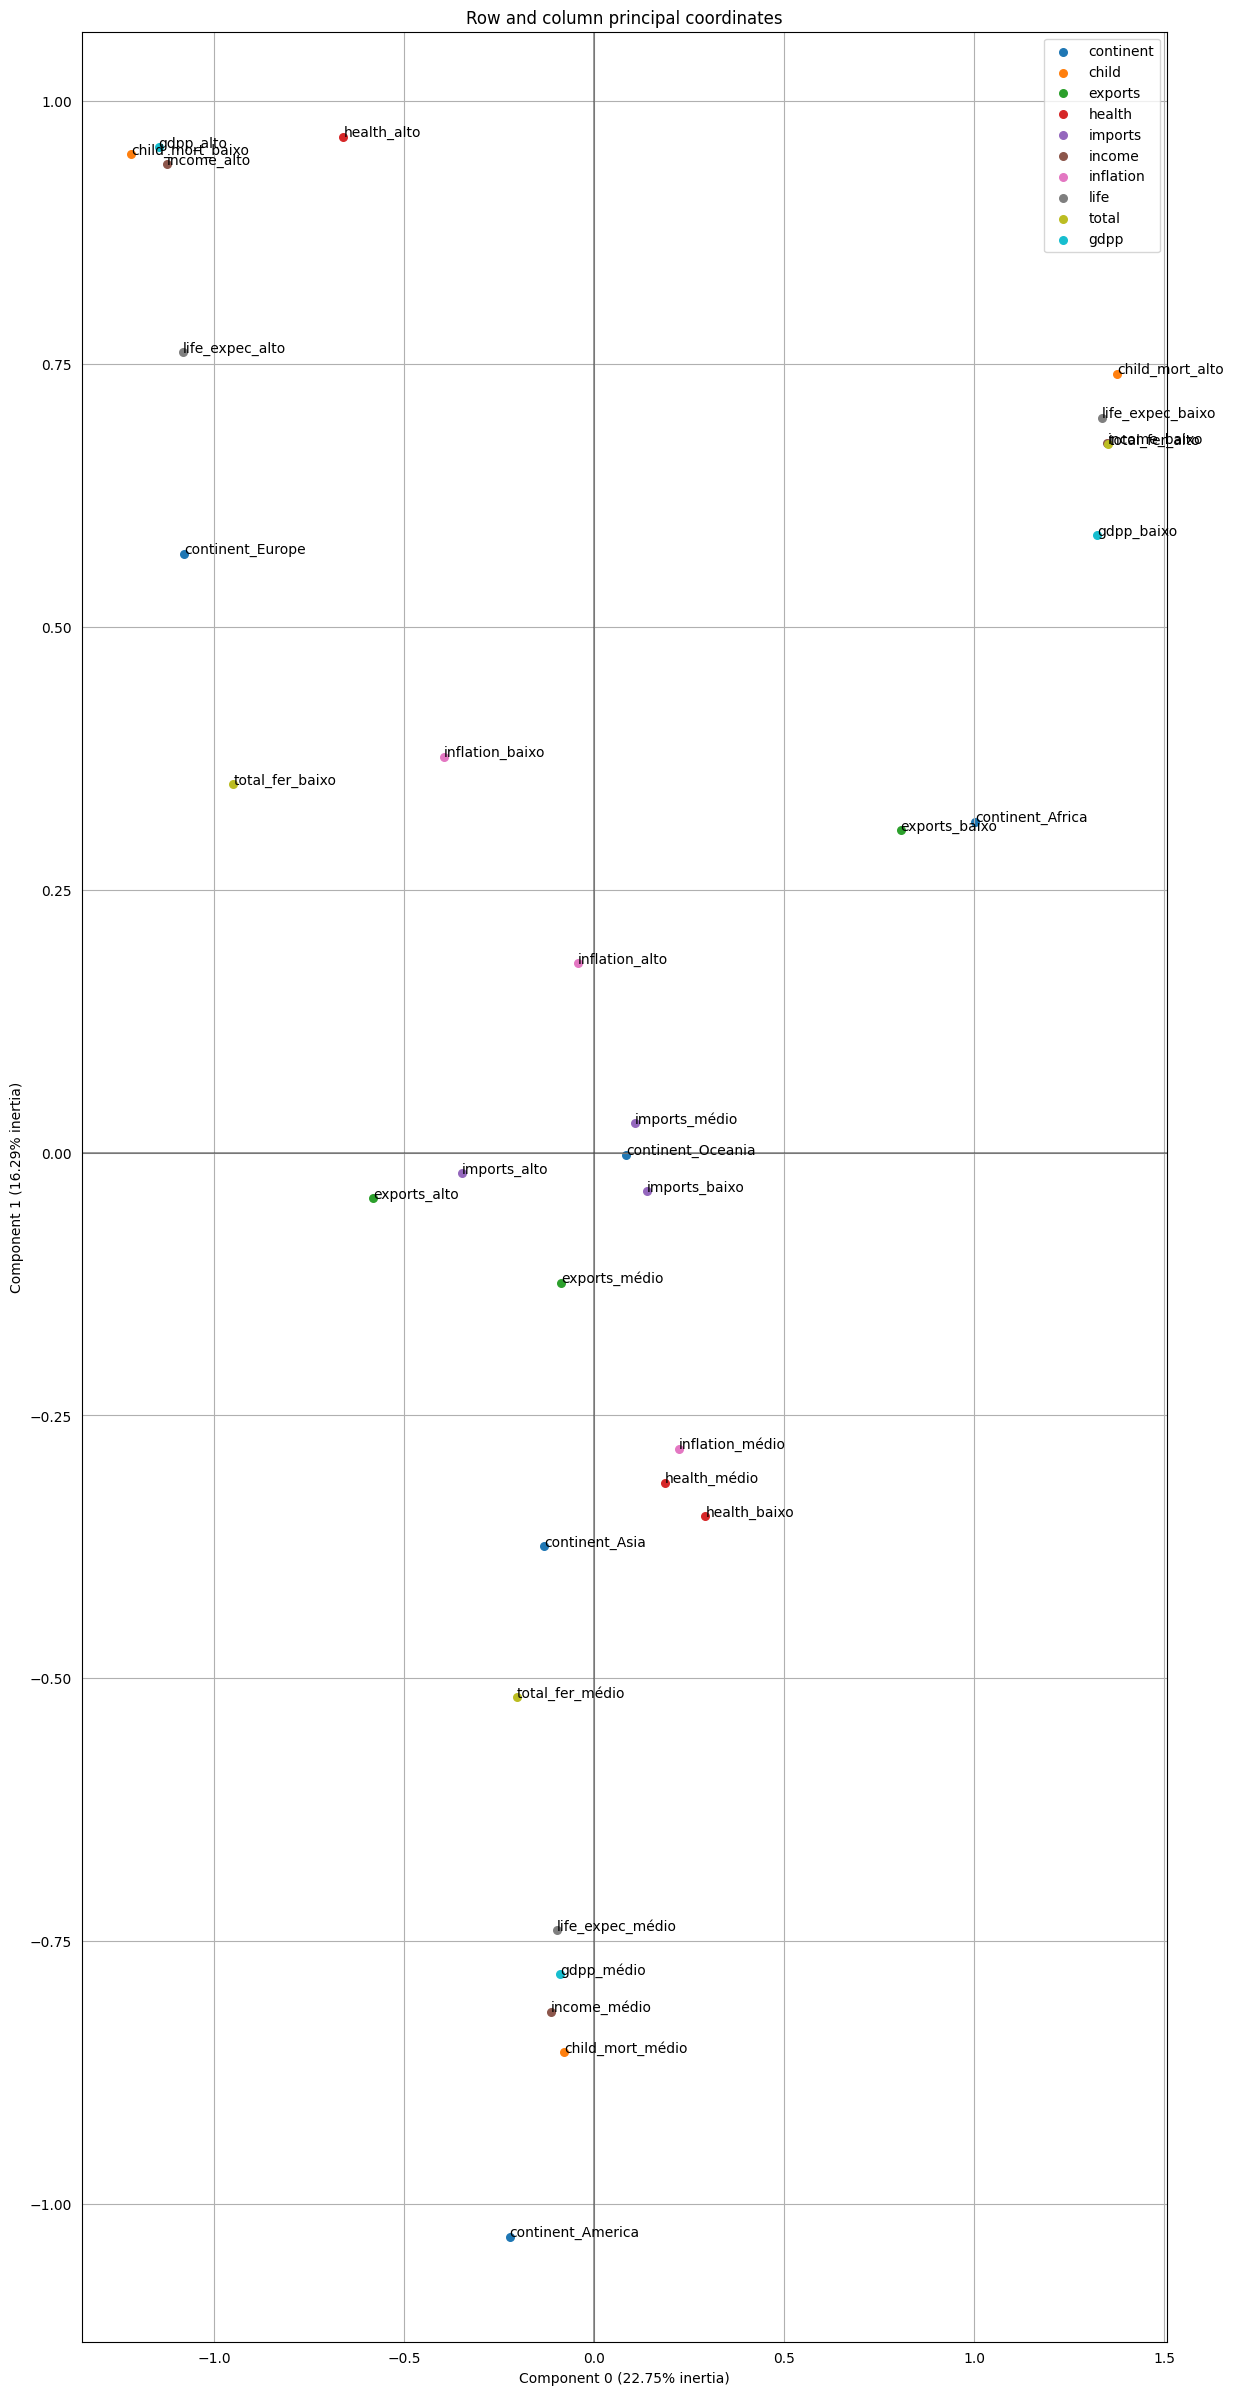

In [23]:
ax = mca.plot_coordinates(X=paises,
                         ax=None,
                         figsize=(14,30),
                         x_component=0,
                         y_component=1,
                         show_column_labels=True,
                         row_points_size=10,
                        show_row_labels=False,
                        show_row_points=False,
                        show_column_points=True,
                        column_points_size=30,
                        legend_n_cols=1)